- デープラーニング
- ここでは多層パーセプトロン(multilayer perceptron: MLP)によるクラス分類と回帰について記載

In [1]:
from IPython.display import set_matplotlib_formats, display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from cycler import cycler
from sklearn.model_selection import train_test_split
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### 線形回帰を図示

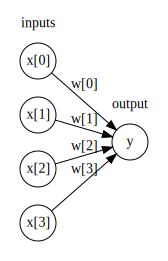

In [2]:
display(mglearn.plots.plot_logistic_regression_graph())

- 左側のノード軍は入力特徴量を表しす
- 接続している線が学習された係数を表す
- 右側のノードが出力を表す

### MLP(一層の隠れ層)を図示

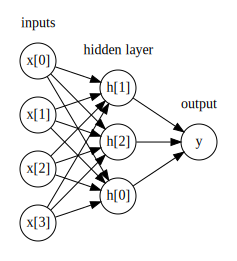

In [3]:
display(mglearn.plots.plot_single_hidden_layer_graph())

- MLPは重み付き和の計算が繰り返し行われる
- まず中間処理ステップを表す隠れユニット(hidden units)の計算で重み付き和が行われ、次にこの隠れユニットの値について重み付き和が行われて最後の結果が出力される
- このモデルには学習しなければいけない係数が多くある。
    - 全ての入力ノードと全ての隠れユニットの間に1つずつ
    - 全てのの隠れ層ユニットと出力ノードの間にも一つずつ
- 個々の隠れユニットの重み付き和を計算したらその結果に対して非線形関数を適用する
    - 多くの場合relu(rectified liner unit: 正規化線形関数)やtanh(hyperbolic tangent: 双曲正接関数)が用いられる
    - reluは０以下の値を切り捨てる
    - tanhは小さい値に対しては-1に大きい値に対しては+1に飽和する

### 活性化関数tanh(双曲正接関数/ハイボリックタンジェント)とrelu(正規化線形関数)

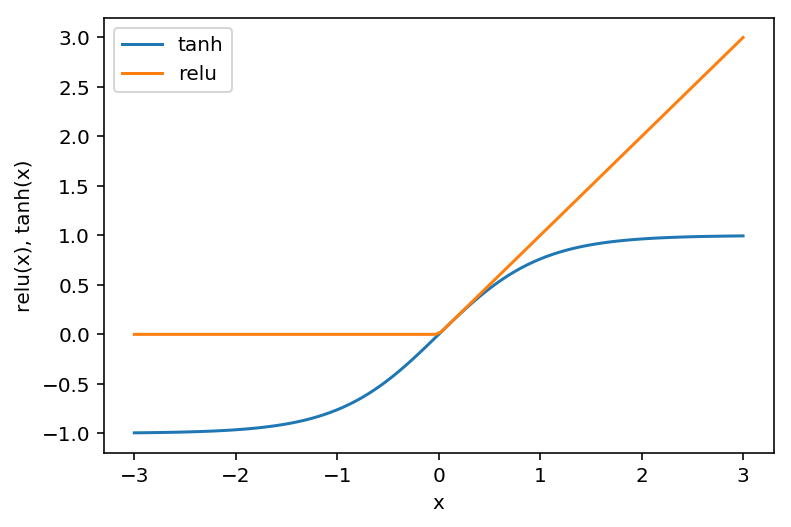

In [4]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label='tanh')
plt.plot(line, np.maximum(line, 0), label='relu')
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

### MLP(2層の隠れ層)を図示

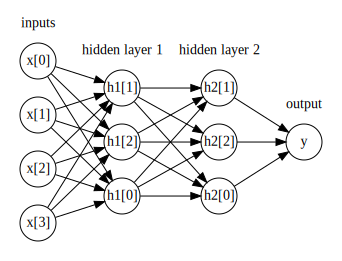

In [5]:
mglearn.plots.plot_two_hidden_layer_graph()

### MLPClassifierを使って動作検証
- two_moonsデータセット

#### パラメタ学習のアルゴリズム
- 1.adam
    - MLPClassifierのデフォルト。データのスケールに敏感。(平均0、分散1の中央化が必要)
- 2.lbfgs
    - 頑健だがモデルが大きい場合や、大規模なデータセットに対しては訓練に時間がかかる
- 3.sgd
    - ディープラーニングの研究者がよく使っている。多くの設定パラメータがあり、最良な結果を得るためにはこれらを調整する必要がある。
    
- 初心者は、`adam`か`lbfgs`を使うとよい

In [6]:
from sklearn.neural_network import MLPClassifier

In [7]:
from sklearn.datasets import make_moons

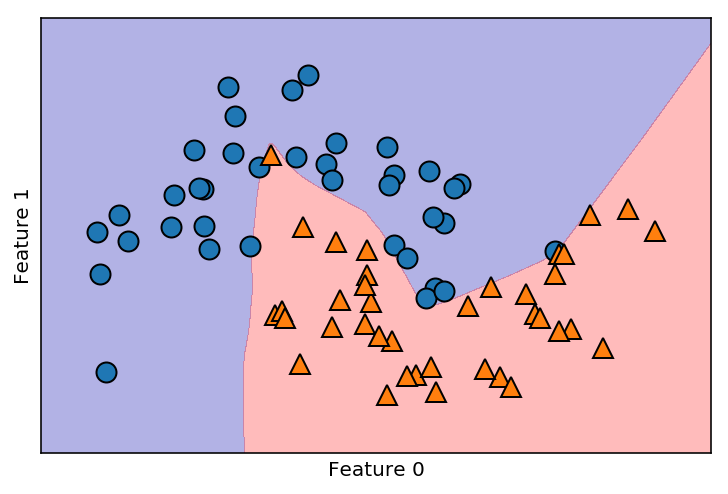

In [8]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1],  y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

- 隠れ層に100ユニットを持つニューラルネットワークによる、two_moonsデータセットの決定境界

- ニューラルネットは全く線形ではないが、比較的なめらかな決定境界を学習している
- デフォルトでは、MLPは100隠れユニットを用いる
    - このデータセットに対しては明らかに大きすぎるため、モデルの複雑さを減らしても良い結果が得られる

#### 隠れ層を10ユニットに減らした結果

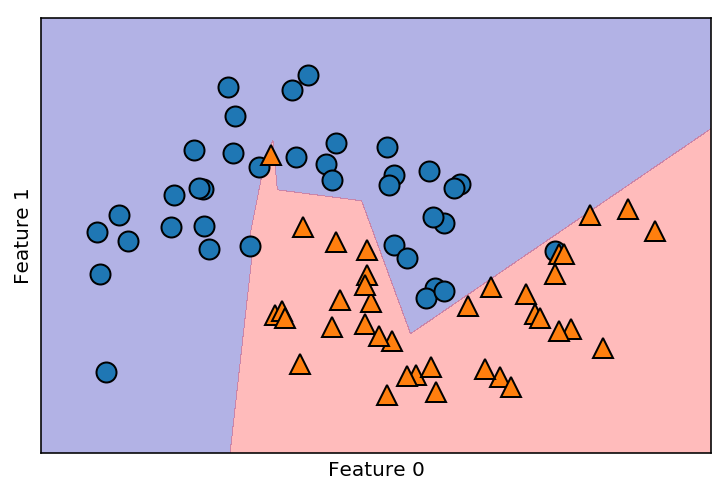

In [9]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1],  y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

- 隠れ層を10にすると決定境界は少しギザギザになる
- デフォルトでは非線形化(活性化関数)にreluを用いる
- 決定境界をなめらかにするためには、
    - 隠れ層のユニット数を増やす
    - 隠れ層を増やす(深くする)
    - 非線形活性化関数にtanhを用いればよい

#### 隠れ層を2層つかう(10ユニット×2)

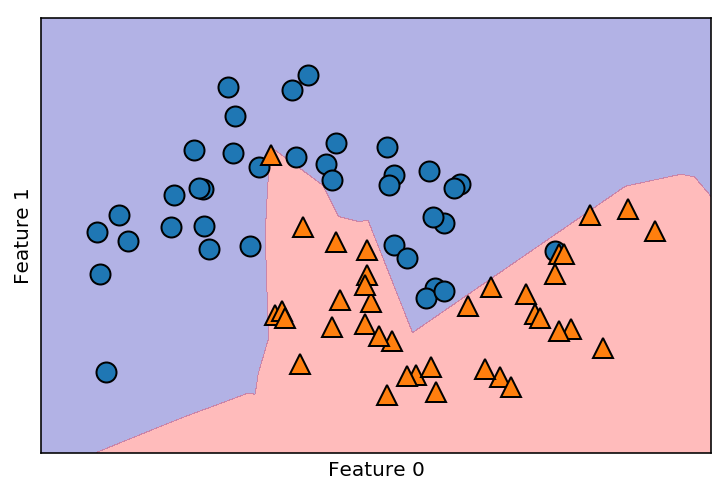

In [10]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1],  y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

#### 隠れ層2層 + 非線形活性化関数にtanhを使う

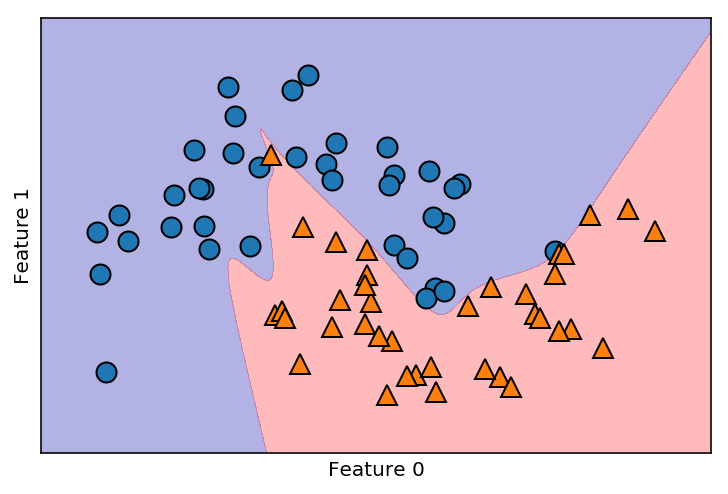

In [11]:
mlp = MLPClassifier(solver='lbfgs', activation='tanh', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1],  y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

### 正則化パラメータ(alpha)
- ニューラルネットワークの複雑さをリッジ回帰や線形クラス分類機で行ったのと同様にl2ペナルティ(l2正則化)で重みを0に近づけることで制御できる
- MLPClassifierではこのパラメタは「alpha」でデフォルトは非常に小さい値(弱い正則化)に設定されている

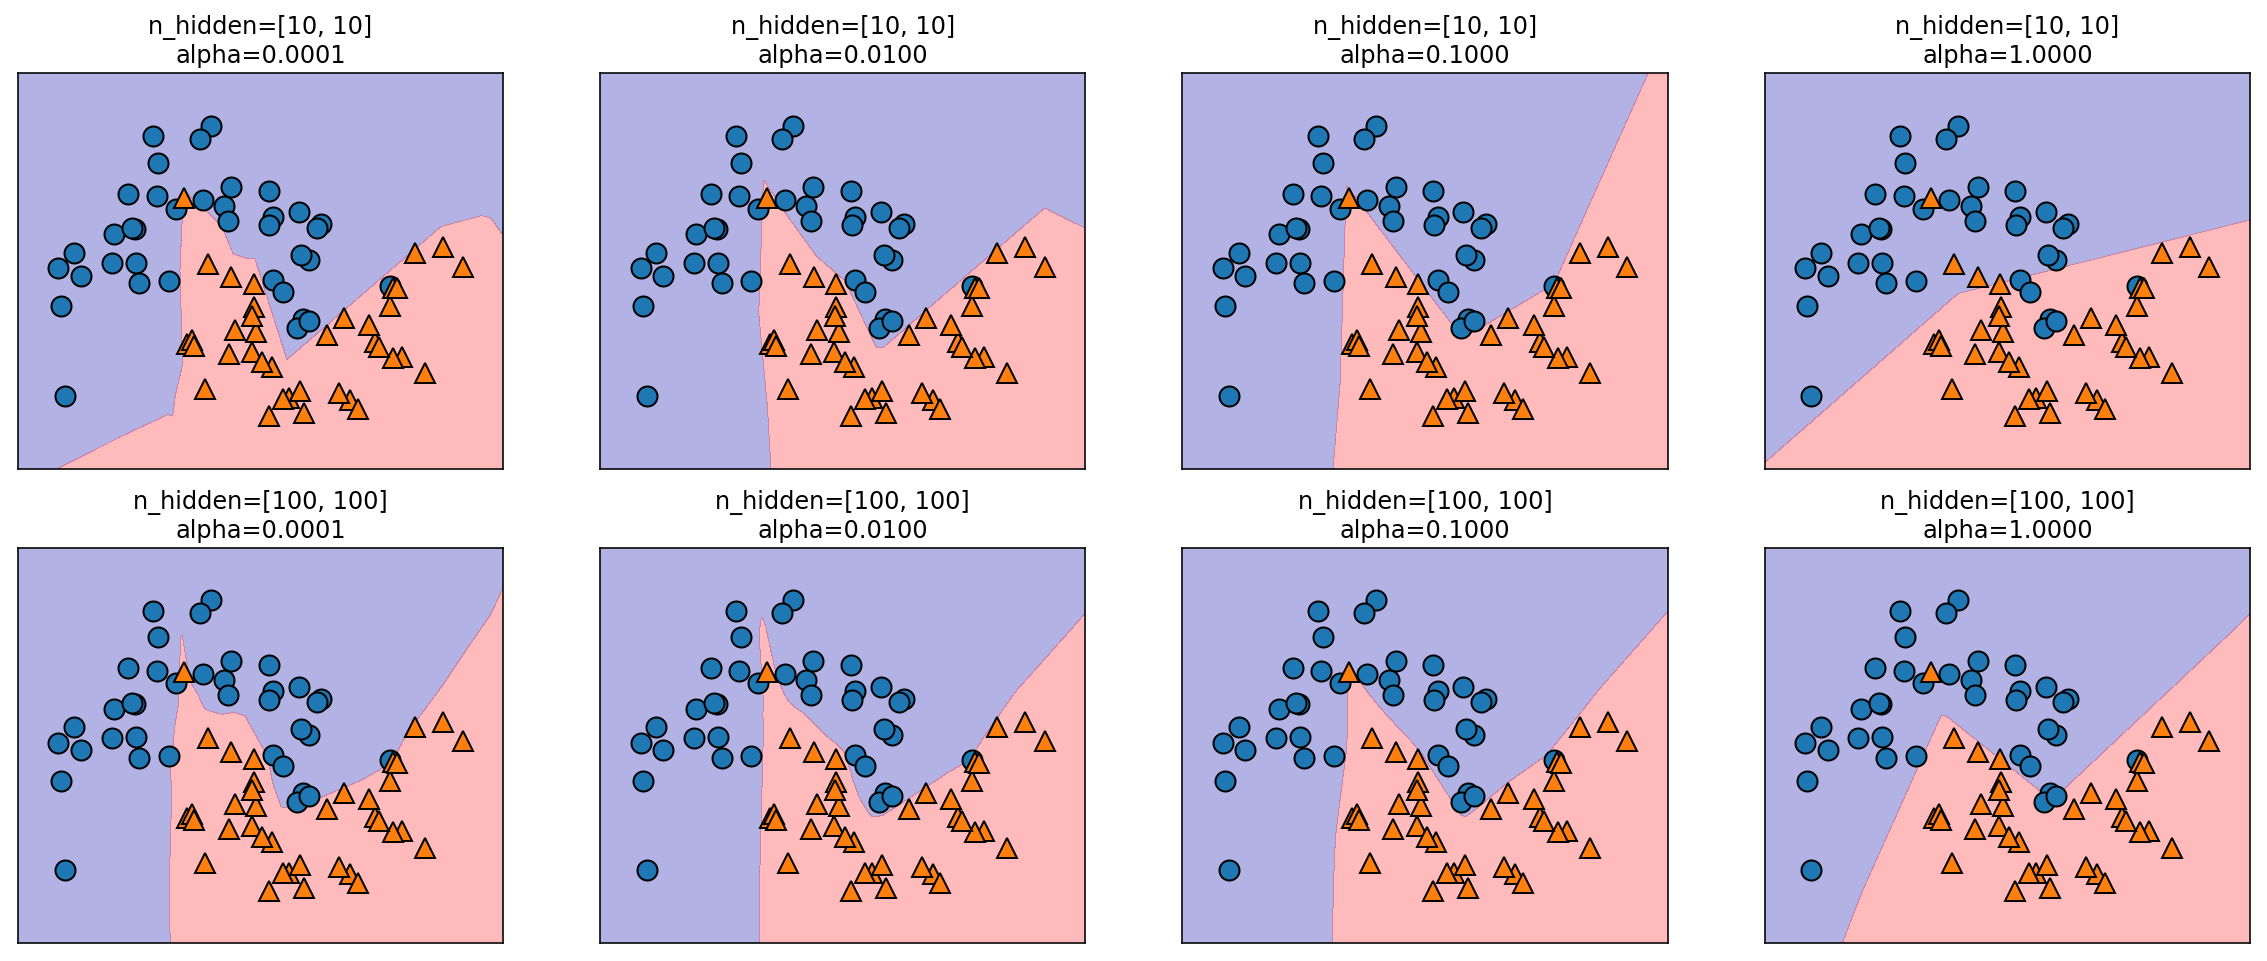

In [12]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0, 
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], 
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1],  y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}"
                     .format(n_hidden_nodes, n_hidden_nodes, alpha))

- alphaが大きくなるほど、モデルは汎用化されている
- ニューラルネットワークには複雑さを制御する方法が「隠れ層の数」、「隠れ層のユニット数」、「正則化(alpha)」など複数存在する
- ニューラルネットワークは学習を開始する前に重みを乱数で割り当てる
    - 乱数シードを固定するとモデルを固定化できる
- ネットワークが大きくなると複雑さを適切に設定しさえすれば、精度にはそれほど大きな影響は与えない

#### 異なる乱数で初期化した決定境界

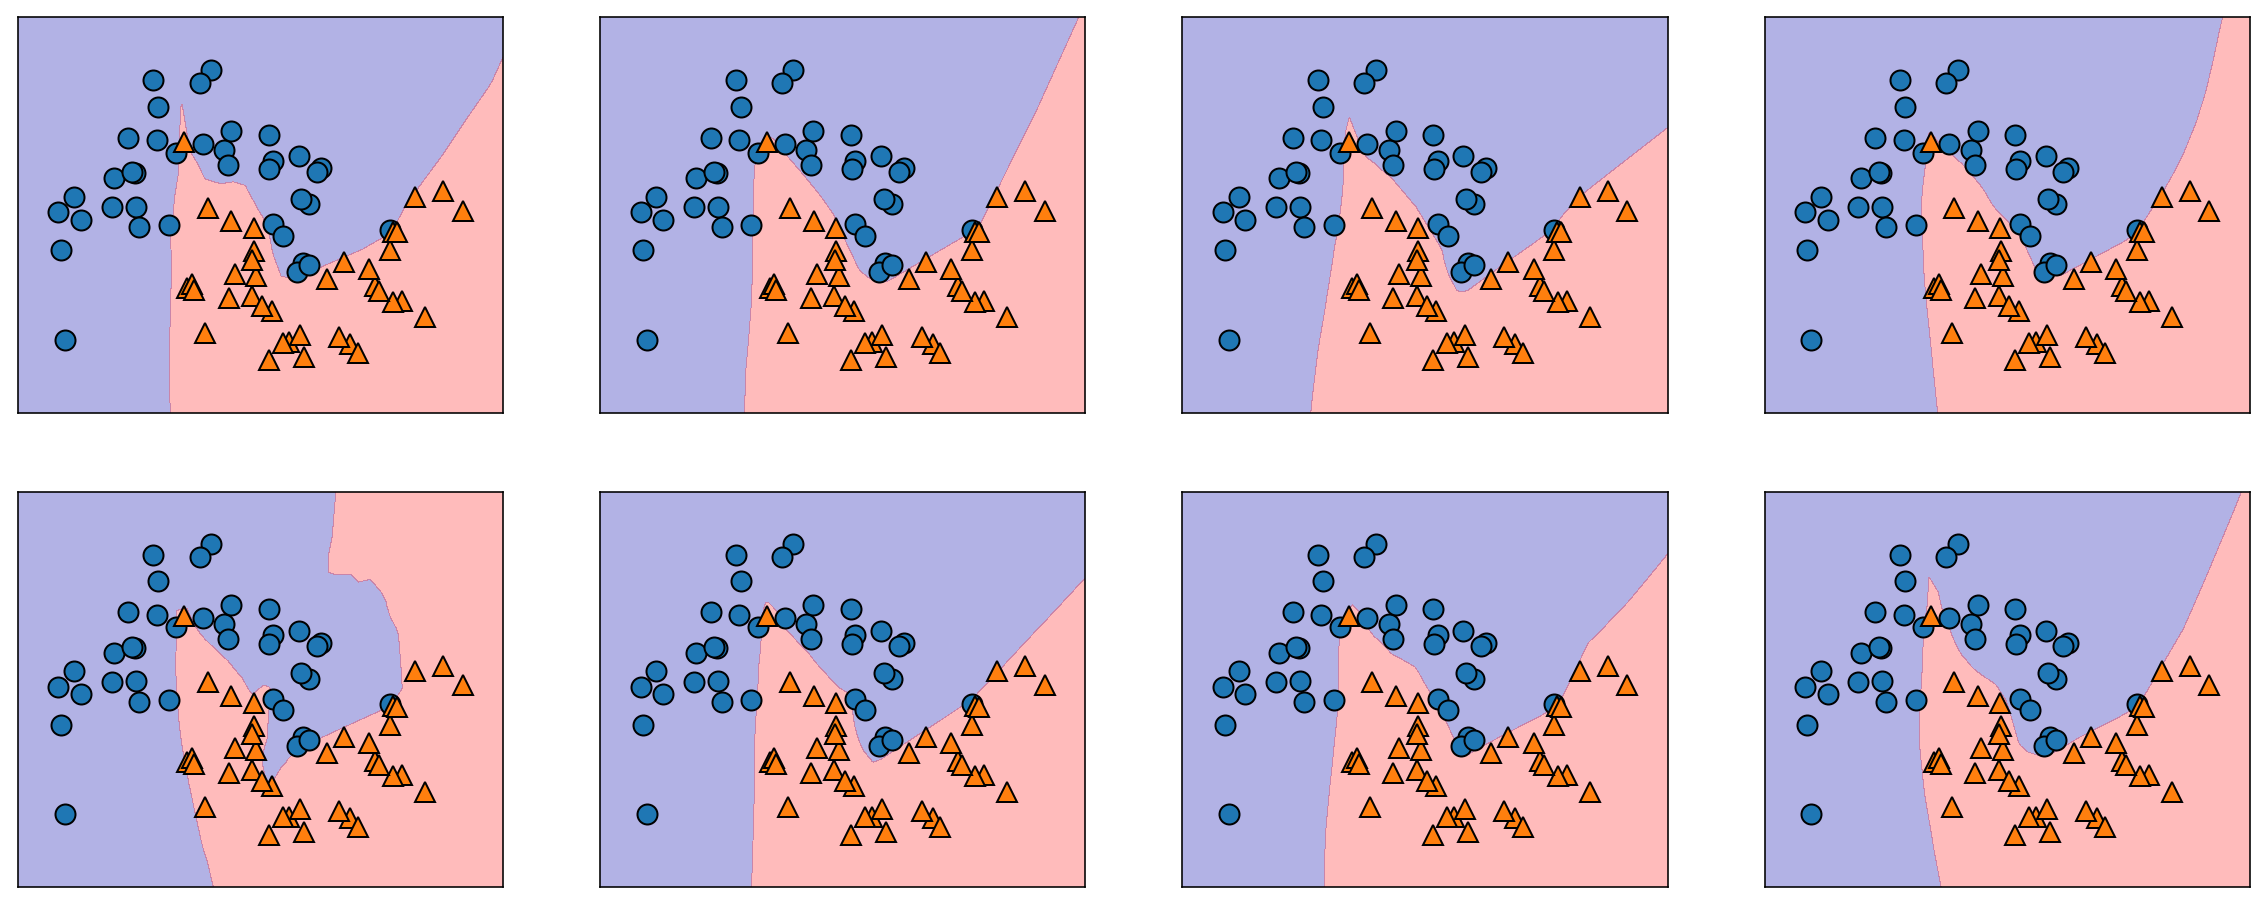

In [13]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i, hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax) 

### cancerデータセットに対して適用する

In [14]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))

Cancer data per-feature maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [15]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.91
Accuracy on test set: 0.88


- 精度は良いが、他のモデルほどではない
- SVCの例と同じくデータスケールが異なってることが問題
    - 理想的には平均が0で分散が1であることが望ましい

In [16]:
# 訓練セットの特徴量ごとの平均値を算出
mean_on_train = X_train.mean(axis=0)
# 訓練セットの特徴量ごとの標準偏差を算出
std_on_train = X_train.std(axis=0)

# 平均を引き、標準偏差の逆数でスケール変換する
# mean=0, std=1になる
X_train_scaled = (X_train - mean_on_train) / std_on_train
# テストデータにも適用する
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Acuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Acuracy on training set: 0.991
Accuracy on test set: 0.965


/Users/amoro/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


- スケール変換を行うことで精度ははるかに良くなる
- 表示されている警告は学習の繰り返し回数が最大値に達したというもの
    - adamアルゴリズムの機能で、学習の繰り返し回数を増やすべきという内容

In [17]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Acuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Acuracy on training set: 0.993
Accuracy on test set: 0.972


- 繰り返し回数(max_iter)を増やすと訓練セットに対する性能が上がる

In [18]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Acuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Acuracy on training set: 0.988
Accuracy on test set: 0.972


- 訓練性能とテスト性能に差があるためモデルの複雑さを下げると汎化性能が上がる可能性がある
- ※ テキストと結果がことなる?

### 学習内容の解析
- ニューラルネットワークが学習した内容を解析することは可能であるが、線形モデルや決定木を用いたモデルの解析よりも難しい
- cancerデータに対して30の入力特徴量の重みを表示する
    - 行が30の特徴量を表す
    - 列は100の隠れユニットに相当する
    - 明るい色が大きな正の値、暗い色が負の値

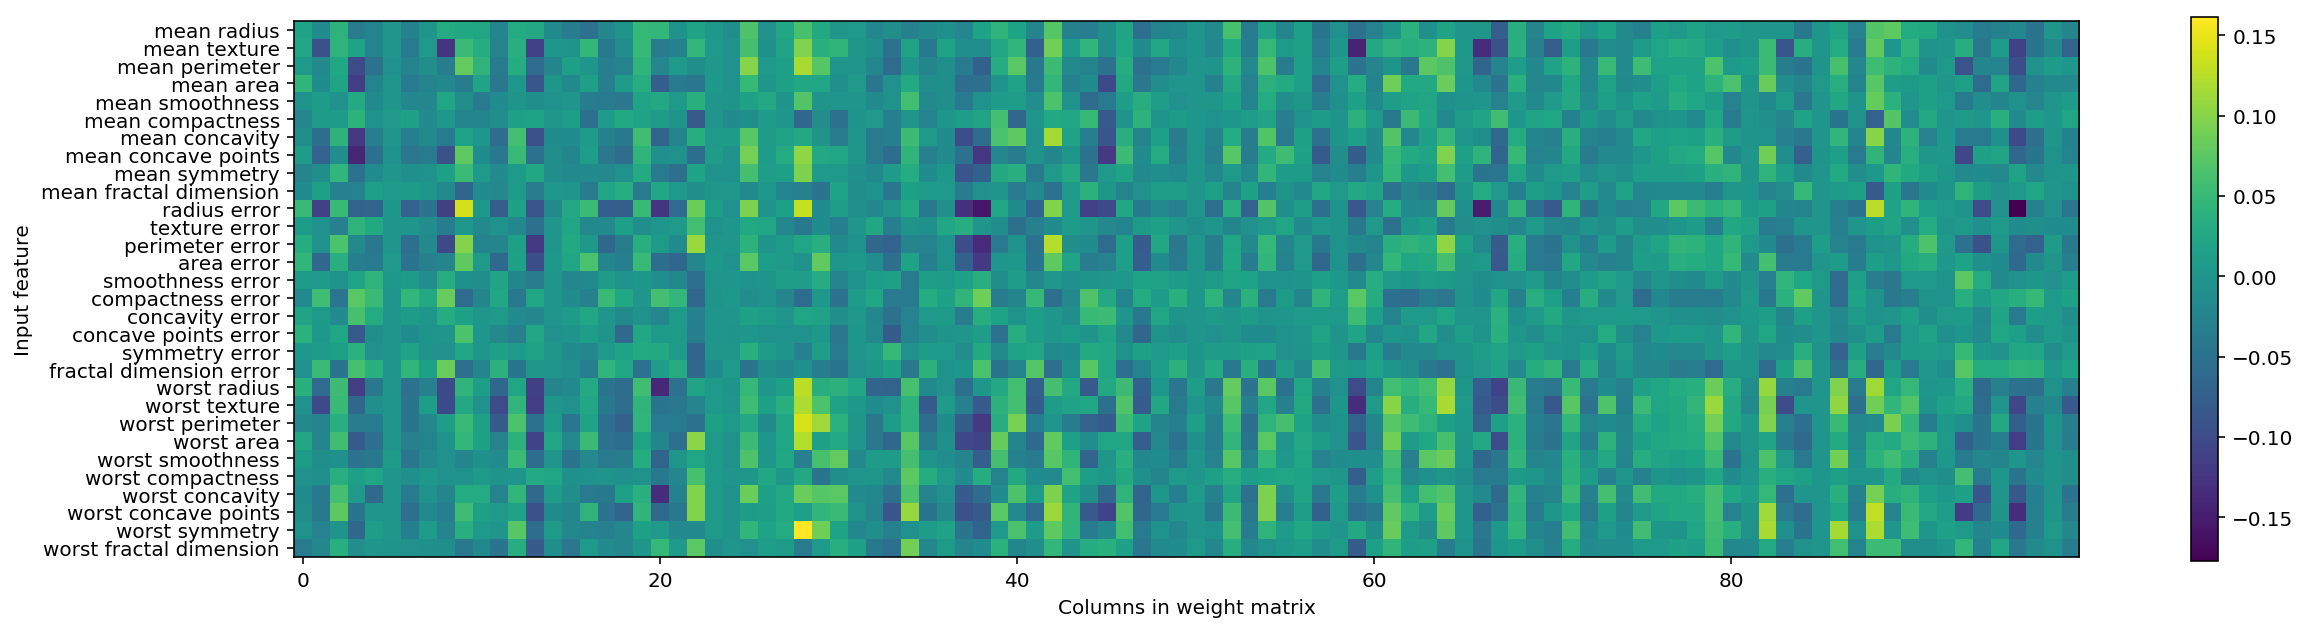

In [19]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

- 一つの推論として、全ての隠れユニットに対して重みがとても小さい特徴量はこのモデルにとって「重要ではない」といえる
    - 「mean smoothness」、「mean compactness」と「smoothness error」から「fractal dimension error」までの特徴量は他の特徴量と比較すると重みが小さい
- これらの特徴量は重要ではないか、これらの特徴量をニューラルネットワークが使えるように表現できていなかったのかのどちらか

### ニューラルネットワークとscikit-learn
- scikit-learn(MLPCLassifierとMLPRegressor)では一般的なニューラルネットワークアーキテクチャを簡単なインタフェースで利用できるが、ニューラルネットワークで可能なことのごく一部しかカバーしていない
- より柔軟またはより大きなモデルを使いたいならscikit-learn以外のディープラーニングライブラリを使うことを検討する
    - keras
    - lasagna
    - tensor-flow
- 人気のディープラーニングライブラリは高性能なGPUを使うことができる
    - scikit-learnはGPUをサポートしていない

### 長所
- 大量のデータに含まれているデータを費やし、信じられないほど複雑なモデルを構築できる
- 十分な計算時間とデータを掛け、慎重にパラメタを調整すれば他の機械学習アルゴリズムに勝てることが多い

### 短所
- 特に大きくて強力なものは、訓練に時間がかかる
- またデータを慎重に前処理する必要がある

### ポイント
- SVMと同様にデータが同質の場合(全ての特徴量が同じ意味をもつ場合)に最もよく機能する
    - 様々な種類の特徴量を持つデータに関しては決定木に基づくモデルの方が性能がよい
- パラメータチューニング自体が一つの技芸になっている

### パラメータ調整
- 最も重要なパラメータは隠れ層の数と層あたりの隠れユニットの数
- 隠れ層は1つか２つで始め、あとから拡張していくのがよい
    - 隠れ層あたりのノードの数は入力層と同じくらいにすることが多いが数千よりも大きくなることはあまりない
- ニューラルネットワークのパラメタ調整の一般的なやり方は次のようになる
    - 1.過剰適合できるように大きいネットワークをつくって、タスクがそのネットワークで訓練データを学習できることを確認する
    - 2.次にネットワークを小さくするか、alphaを増やして正則化を強化して汎化性能を向上させる